# Getting a prior for the declination time from Holmberg (1988)

We use the measurements from Holmberg (1988) for the **normal voice** loudness modality.

This could be extended with the soft and loud voice modalities. For the female soft voice, see the erratum Holmberg (1989a). With this we could also get more precise bounds. But this is unlikely to influence the prior for $\theta$ (such as $r$) downstream, so we skip this refinement. The tables were extracted with <https://www.extracttable.com/>.

In [1]:
%run init.ipy

from dgf import constants
from dgf.prior import holmberg

import pandas as pd

/home/marnix/WRK/thesis/py/init.py:38: UserWarning: External XLA configuration is `XLA_FLAGS=--xla_force_host_platform_device_count=8`
  warnings.warn(f'External XLA configuration is `XLA_FLAGS={XLA_FLAGS}`')


In [2]:
df = pd.concat([holmberg.read('men'), holmberg.read('women')])
df

,parameter,x,sd,range,sex,lower,upper
0,SPL (dB),79.500,3.300,73.4-85.9,men,73.400,85.900
1,F0 (Hz),116.000,12.000,93-135,men,93.000,135.000
2,pressure (cm H2O),6.300,1.400,4.2-9.6,men,4.200,9.600
3,average flow (l/s),0.190,0.070,0.1-0.3,men,0.100,0.300
4,glottal resistance (cm H2O/l/s),37.700,16.700,12.3-77.2,men,12.300,77.200
5,SPL (dB),79.500,3.400,73.3-87.0,men,73.300,87.000
6,period (s),0.009,0.001,0.007-0.011,men,0.007,0.011
7,maximum airflow declination rate (l/s²),279.600,90.400,139.5-470.1,men,139.500,470.100
8,peak flow (l/s),0.380,0.090,0.21-0.54,men,0.210,0.540
9,ac flow (l/s),0.260,0.070,0.16-0.42,men,0.160,0.420


In [3]:
from holmberg import process_sexes

pdf = pd.concat([
    process_sexes(df, 'F0 (Hz)'),
    process_sexes(df, 'open quotient'),
    process_sexes(df, 'speed quotient'),
    process_sexes(df, 'closing quotient'),
    process_sexes(df, 'ac flow (l/s)'),
    process_sexes(df, 'maximum airflow declination rate (l/s²)')
])

pdf

,parameter,x,sd,lower,upper
0,F0 (Hz),160.500,26.832816,93.00,237.00
0,open quotient,0.680,0.122066,0.46,0.95
0,speed quotient,1.735,0.410366,1.19,2.58
0,closing quotient,0.255,0.056569,0.14,0.37
0,ac flow (l/s),0.200,0.086023,0.09,0.42
0,maximum airflow declination rate (l/s²),221.800,107.137342,91.00,470.10


We see a very good fit of our prior to the $T_d$ data simulated from Holmberg.

,0
count,100000.000000
mean,1.024067
std,0.547555
min,0.196973
25%,0.634759
50%,0.895221
75%,1.272960
max,4.475284


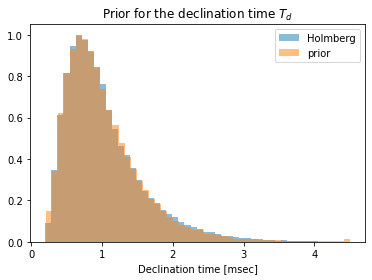

In [8]:
U0 = holmberg.truncnorm(df, 'ac flow (l/s)')
Ee = holmberg.truncnorm(df, 'maximum airflow declination rate (l/s²)')

NUMSAMPLES = int(1e5)

Td = U0.rvs(NUMSAMPLES)/Ee.rvs(NUMSAMPLES)*1000 # msec

hist(Td, bins=50, density=True, alpha=0.5, label=['Holmberg']);

display(pd.DataFrame(Td).describe())

prior = holmberg.declination_time_prior()
samples = prior.sample(NUMSAMPLES, seed=jax.random.PRNGKey(50))
hist(np.array(samples), bins=50, density=True, alpha=0.5, label=['prior']);

legend()
title('Prior for the declination time $T_d$')
xlabel('Declination time [msec]');